In [3]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
#open the train csv we downloaded from the titanic kaggle
#website
titanic_df = pd.read_csv('train.csv')
titanic_df.head() #0 means false, passenger didn't survive
#Pclass means what class the passenger was in
#Sibsp means if they had siblings onboard
#a lot of cabin info is missing so we'll probably
#have to delete that at somepoint
#S, C, and Q is for the cities

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#now that we know the columns and how much data we're
#working with, lets get to setting up our project:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#1 Who were the passengers on the Titanic?

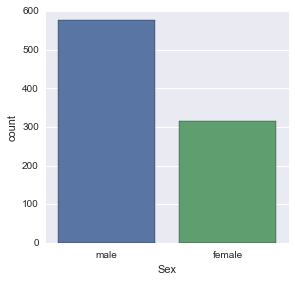

In [8]:
#First lets quickly check out the gender counts
sns.factorplot(x='Sex', kind = 'count', data = titanic_df)

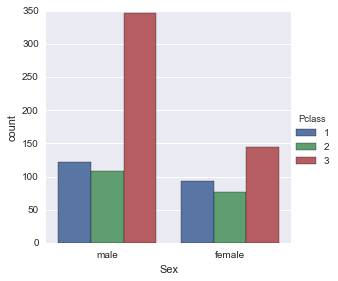

In [9]:
#Next lets see the genders by classes
sns.factorplot('Sex',data=titanic_df,
               kind = 'count',hue='Pclass')
#IF YOU'RE LOOKING FOR A COUNT, SPECIFY THAT

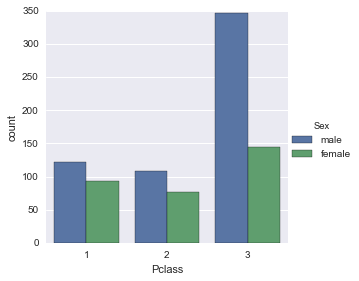

In [10]:
#To see the genders by classes though, we must use
#Pclass as the x-axis:
sns.factorplot('Pclass',data=titanic_df, kind = 'count',
              hue = 'Sex')

In [11]:
#What might be interesting to know is the diff b/w
#males, females and children. We want male, female, and
#children. We can use the apply technique to make a fx
#to do this
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [12]:
#create new column that grabs age and sex columns and
#then applies the previously defined fx to fill the
#column values with the male,female,or child
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)


In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


male      537
female    271
child      83
Name: person, dtype: int64

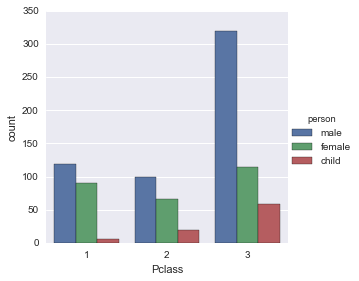

In [14]:
#Take a look at male,female,child counts per class
#with plot and values
sns.factorplot('Pclass', data = titanic_df,
               kind = 'count',hue = 'person')
titanic_df['person'].value_counts()

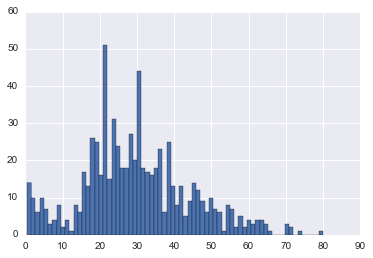

In [15]:
#age distribution:
titanic_df['Age'].hist(bins=70)

In [16]:
titanic_df['Age'].mean()

29.69911764705882

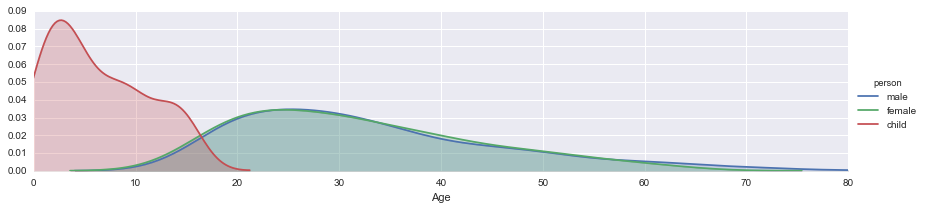

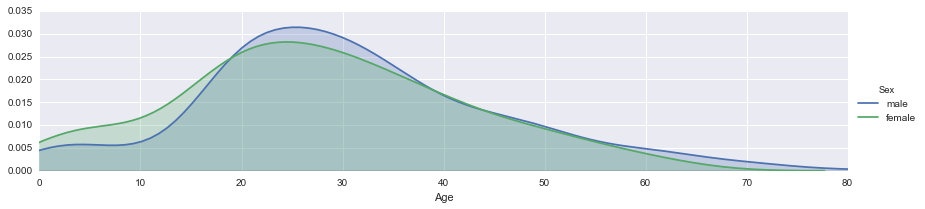

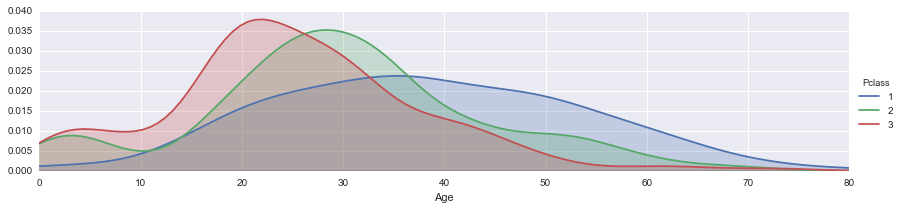

In [17]:
#Whats another way to visualize this data?
#We can use a facet grid with seaborn
#and the dataframe we made to plot multiple KDE
#plots on one plot:
fig = sns.FacetGrid(titanic_df, hue = 'person',
                    aspect = 4)
#created facetgrid using Sex and a thick aspect ratio

fig.map(sns.kdeplot, 'Age', shade = True)
#map method for facetgrid used to plot all kdeplots
#based on age

oldest = titanic_df['Age'].max()
#variable to get the oldest person
fig.set(xlim = (0, oldest))
#sets the interval to 0 to the oldest person
fig.add_legend()
#adds the legend

fig2=sns.FacetGrid(titanic_df, hue = 'Sex',
                  aspect = 4)

fig2.map(sns.kdeplot, 'Age', shade = True)

fig2.set(xlim= (0,oldest))

fig2.add_legend()

#Plotted the male vs. female kde's and
#the male vs. female vs. child kde's to show how
#children affect kdeplots

fig3=sns.FacetGrid(titanic_df, hue = 'Pclass',
                  aspect = 4)

fig3.map(sns.kdeplot, 'Age', shade = True)

fig3.set(xlim= (0,oldest))

fig3.add_legend()

#Plotted class kde's for age 

In [18]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [19]:
#2 What deck were the passengers on and how does that
#relate to their class?

In [20]:
#Cabin reveals information about deck floors. It does
#have null values so we have to drop those:
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head() #no null values in this df. Index still
#is the original. The info here is the cabin deck
#and the cabin number

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

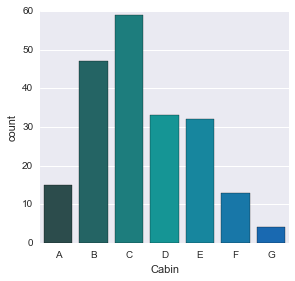

In [22]:
#We just need the cabin deck letter so we can do that
#with a for loop:
levels = [] #initialize an empty list

for level in deck:
    levels.append(level[0]) #for every level in deck
#append the first element of the string (each row)

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot(x ='Cabin',data = cabin_df,
              kind = 'count', palette = 'winter_d',
              order = ['A','B','C','D','E','F','G'],
              )
#converted list to dataframe and named the column
#then factorplot (barplot)of the data with the 
#winter_d color palette. We placed the decks in order
#and got rid of the 'T' column which was probably
#bad data since that isn't a deck

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [24]:
#3 Where did the passengers come from?

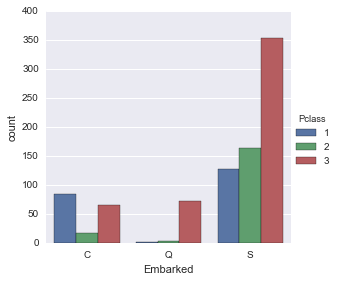

In [25]:
#'Embarkment' column filled w S,C, and Q values.
#Can make a quick factor plot of where people came 
#from
sns.factorplot('Embarked', data = titanic_df,
              hue = 'Pclass', kind = 'count',
              order = ['C','Q','S'])

In [26]:
#it would be interesting to see the cabins each
#city tended to. Pivot table using embarked? idk,
#these are my own thoughts, not the lecture stuff


In [27]:
#4 Who was alone and who was with family?
#SibSp column is if the passenger had a sibling on 
#board, 0 is false, no siblings. Parch is if the 
#passenger had a child or parent on board. 
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [28]:
titanic_df['Alone'].head()
#anything that's a 0 here means the passenger was 
#alone on the Titanic

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [29]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'
#anywhere in the 'Alone' column that was more than 0
#displays the string 'With Family' now and otherwise
#says 'Alone'

C:\Users\Sidna\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


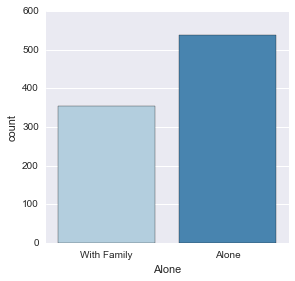

In [30]:
sns.factorplot(x = 'Alone', data = titanic_df,
              palette = 'Blues', kind = 'count')
#factorplot of passenger count of who was alone
#and who was with family

In [31]:
#5 What factors helped someone survive the sinking of the Titanic?
#Create a new column in the dataframe thru mapping
#new column grabs info from Survived column and maps the 0 to no and
#1 to yes and then visualization
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})


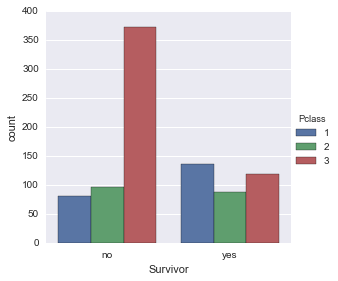

In [32]:
sns.factorplot(x='Survivor', data = titanic_df, hue= 'Pclass',
               kind = 'count')

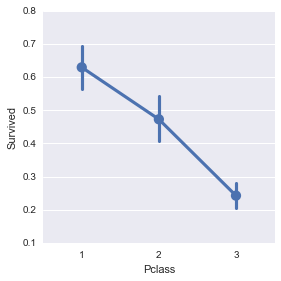

In [33]:
sns.factorplot('Pclass','Survived', data = titanic_df)
#general survivor rates for 3rd class are much lower...could this be because
#of the women and children? 

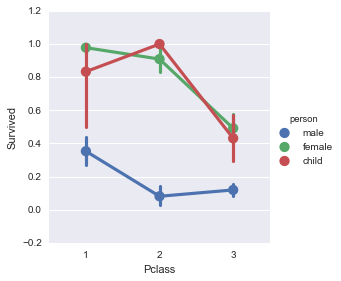

In [34]:
sns.factorplot('Pclass','Survived',hue= 'person', data = titanic_df)

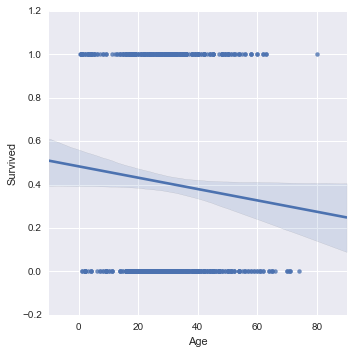

In [35]:
sns.lmplot('Age','Survived', data = titanic_df)
#the y=1's on top are all the passengers who survived and their ages on the x-axis
#the y=0's on the bottom are all the passengers who died and their ages
#the general trend from the best fit line says you're less likely to survive
#the older you are

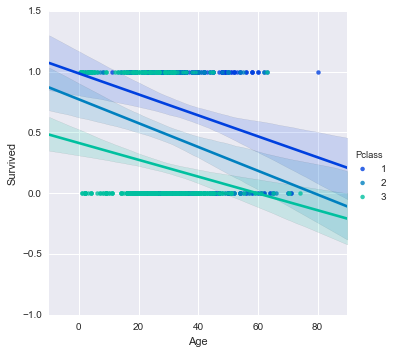

In [36]:
sns.lmplot('Age','Survived', hue= 'Pclass', data = titanic_df,
          palette = 'winter')

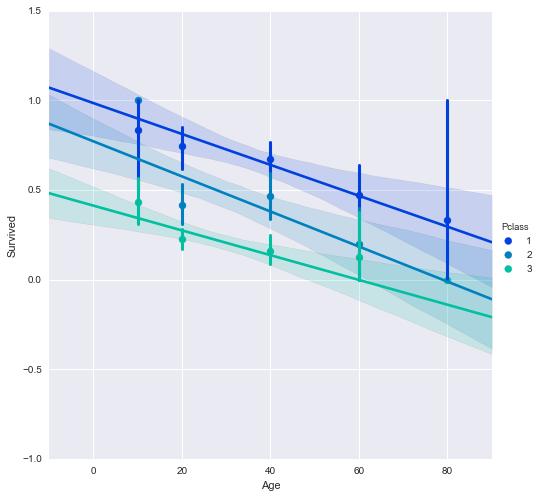

In [37]:
#we can clean up the data a bit to visualize everything more clearly
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue = 'Pclass', data = titanic_df, 
          palette = 'winter', x_bins = generations, size = 7)

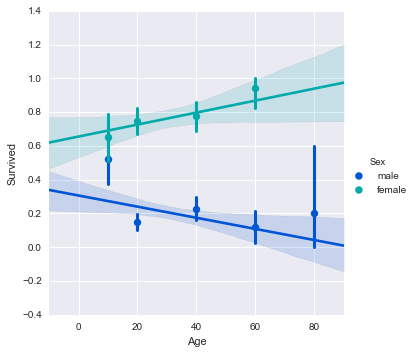

In [38]:
sns.lmplot('Age','Survived', hue = 'Sex', data = titanic_df, 
          palette = 'winter', x_bins = generations)
#comparing age and gender for survival rates

In [39]:
#6 Did the deck have an effect on the passengers survival rate?

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [41]:
#Figure out how to get survivor rates for each deck
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [42]:
cabin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 1 columns):
Cabin    204 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [43]:
cabin_survivors = cabin_df #make new df to preserve old one

In [44]:
cabin_survivors.index= deck.index #equate the index to the deck index so the cabins and 
#survival information line up with the passenger's index

In [45]:
cabin_survivors.head()

,Cabin
1,C
3,C
6,E
10,G
11,C


In [46]:
titanic_df['Cabin_Survivors'] = cabin_survivors.Cabin
#added survivors column to plot cabin data vs suriviors and other stuff

In [47]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Cabin_Survivors
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN


In [55]:
#fill cabin survivors NA values with string NA
titanic_df.dropna(inplace = True)

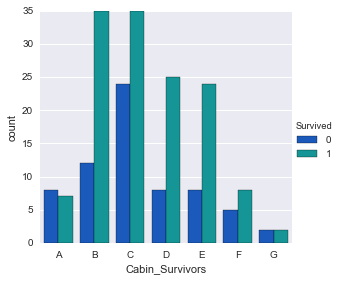

In [75]:
sns.factorplot(x='Cabin_Survivors', hue = 'Survived', data = titanic_df, kind = 'count', palette = 'winter',
              order = ['A','B','C','D','E','F','G'])
#made factorplot of deck survivors vs deaths of the available information. 
#Deck's B thru E seem to have similar levels of death to survival rates, but decks
# A, F, and G seem much more likely to have dead people

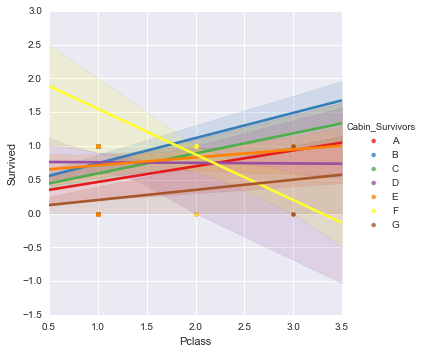

In [80]:
sns.lmplot('Pclass','Survived', hue = 'Cabin_Survivors', data = titanic_df,
           palette = 'Set1', hue_order = ['A','B','C','D','E','F','G'])
#Maybe deck and class level go hand in hand? From this lmplot we can see that 
#in most decks, the lower the class you were the more probable it was you would live.
#We must check that against actual survival rates per class to see if it is true
#Upon checking, it is clear many fewer 3rd class passengers made it out alive
#so why is this data showing that only class F fits the proper data?

In [39]:
#7 Did having a family member increase the odds of surviving the crash?

In [122]:
#Create new column so that if the cell corresponding to it in the Alone 
# column contains "with family" then it turns into 0, and if it 
#says alone it turns into 1
titanic_df['Lone'] = titanic_df.Alone.map({'With Family': 0, 'Alone': 1})
#Honestly did this for pretty much no reason. It is more clear to plot Alone column vs Survived Column

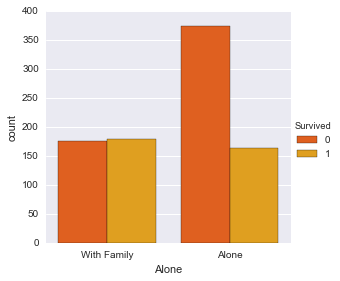

In [125]:
sns.factorplot('Alone',hue = 'Survived', kind = 'count', data = titanic_df,
              palette = 'autumn')
#Shows that having family is considerably better for survival

In [133]:
#Seems that if you were alone you were more likely to die. Brings up two
#questions. 1, what let you live if you were alone? and 2, what made
#you die if you were with family?
#These questions are pretty much answered in the other plots we made. Lets
#consolidate all the information we have and try to make a predictive 
#function